In [1]:
# training data
x_train = [[1], [2], [3], [4]]
y_train = [[0], [-1], [-2], [-3]]

# Scikit-Learn의 선형회귀 예제
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [2]:
# TensorFlow의 선형회귀 예제
import tensorflow as tf

# Model Parameter
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)

# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [[1], [2], [3], [4]]
y_train = [[0], [-1], [-2], [-3]]

MaxIter = 10
# training loop
init = tf.global_variables_initializer()
with tf.Session() as sess:
	sess.run(init)

	for i in range(MaxIter):
		curr_W, curr_b, curr_loss = sess.run([W, b, loss], feed_dict={x:x_train, y:y_train})
		print(i, curr_W, curr_b, curr_loss)
		sess.run(train, feed_dict={x:x_train, y:y_train})
	curr_W, curr_b, curr_loss = sess.run([W, b, loss], feed_dict={x:x_train, y:y_train})


0 [0.3] [-0.3] 23.66
1 [-0.21999997] [-0.456] 4.0181446
2 [-0.39679998] [-0.49552] 1.8198745
3 [-0.459616] [-0.4965184] 1.5448234
4 [-0.48454273] [-0.48487374] 1.4825068
5 [-0.49684232] [-0.4691753] 1.444397
6 [-0.5049019] [-0.45227283] 1.409699
7 [-0.5115062] [-0.43511063] 1.3761029
8 [-0.51758033] [-0.41800055] 1.3433373
9 [-0.523432] [-0.40104443] 1.3113549


In [3]:
import tensorflow as tf

# Model Parameter
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)

# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [[1], [2], [3], [4]]
y_train = [[0], [-1], [-2], [-3]]

MaxIter = 10
# training loop
init = tf.global_variables_initializer()
with tf.Session() as sess:
	sess.run(init)

	for i in range(MaxIter):
		curr_W, curr_b, curr_loss = sess.run([W, b, loss], feed_dict={x:x_train, y:y_train})
		print(i, curr_W, curr_b, curr_loss)
		sess.run(train, feed_dict={x:x_train, y:y_train})
	curr_W, curr_b, curr_loss = sess.run([W, b, loss], feed_dict={x:x_train, y:y_train})


0 [0.3] [-0.3] 23.66
1 [-0.21999997] [-0.456] 4.0181446
2 [-0.39679998] [-0.49552] 1.8198745
3 [-0.459616] [-0.4965184] 1.5448234
4 [-0.48454273] [-0.48487374] 1.4825068
5 [-0.49684232] [-0.4691753] 1.444397
6 [-0.5049019] [-0.45227283] 1.409699
7 [-0.5115062] [-0.43511063] 1.3761029
8 [-0.51758033] [-0.41800055] 1.3433373
9 [-0.523432] [-0.40104443] 1.3113549


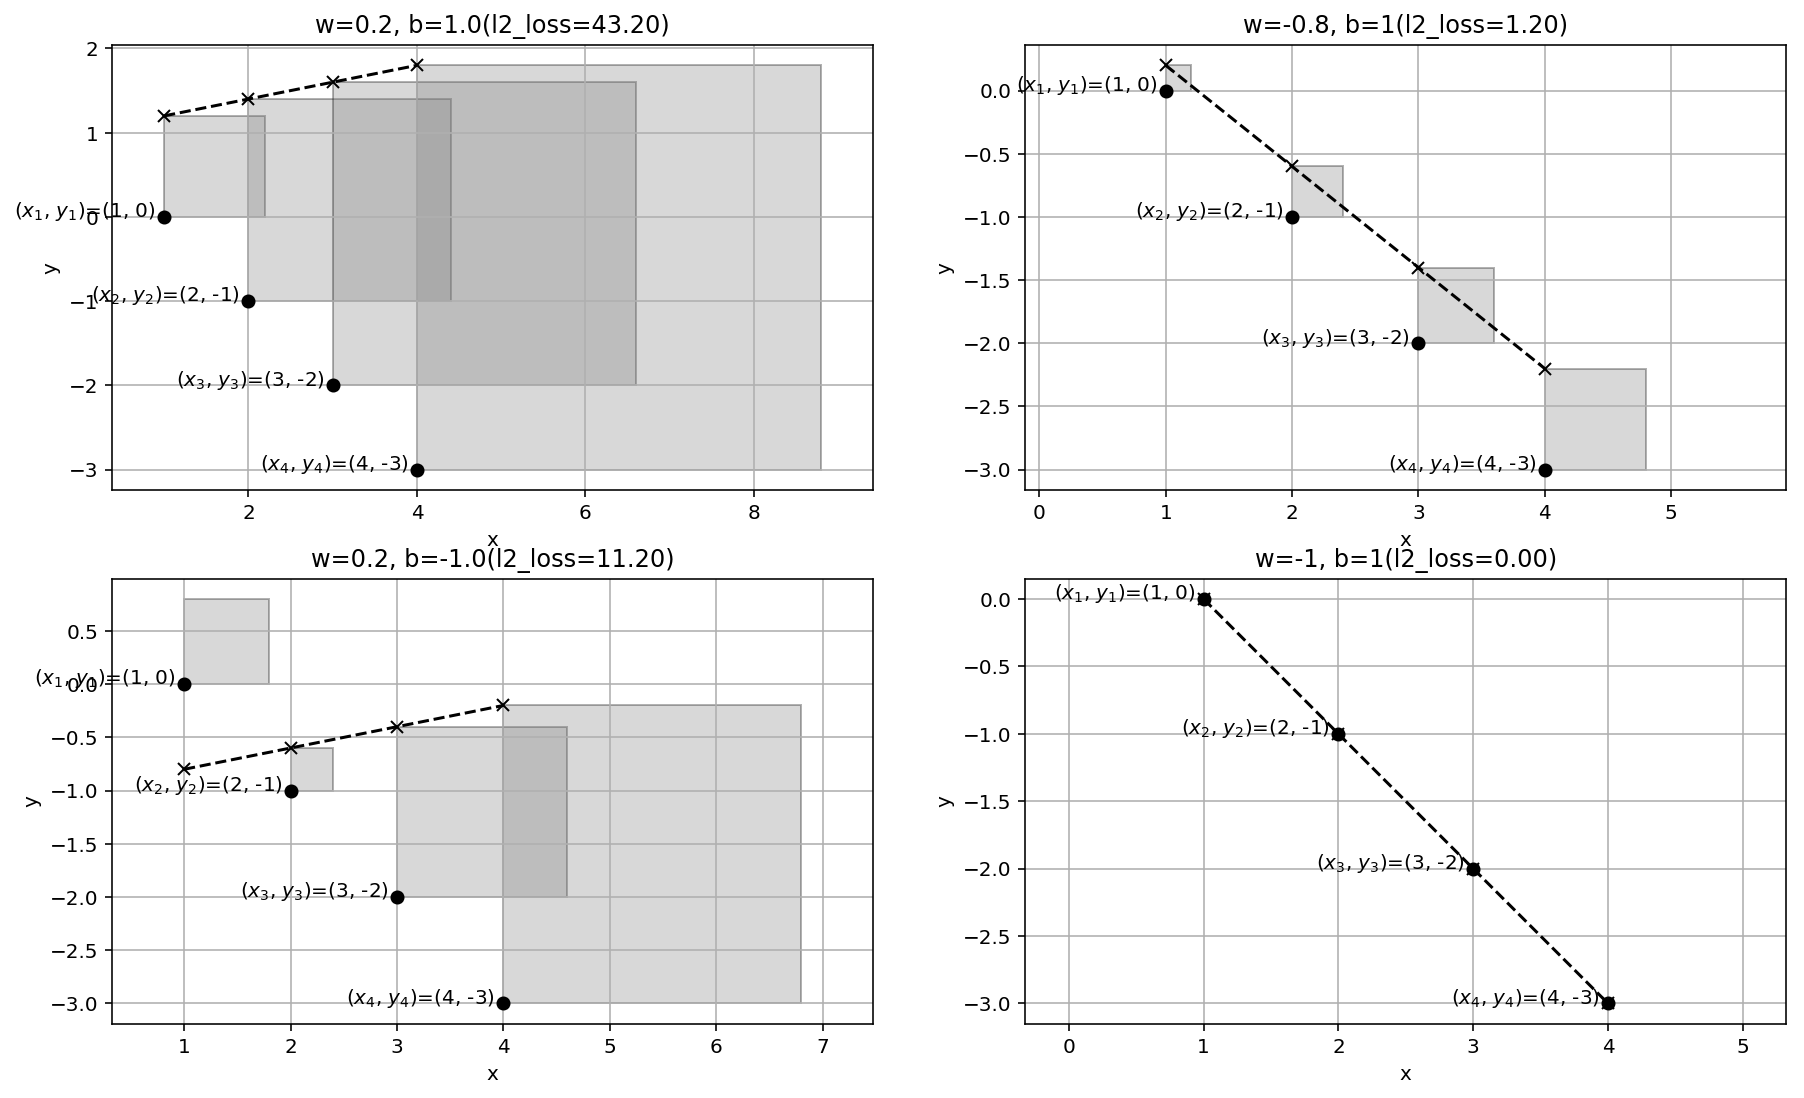

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from visualize import visualize_l2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def l2_loss(w,b,x,y):
    return np.sum(np.square(w*x + b - y))

x_train = np.array([1, 2, 3, 4])
y_train = np.array([0, -1, -2, -3])

plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
visualize_l2(0.2, 1.0, x_train, y_train, l2_loss)
plt.subplot(2,2,2)
visualize_l2(-0.8, 1, x_train, y_train, l2_loss)
plt.subplot(2,2,3)
visualize_l2(0.2, -1.0, x_train, y_train, l2_loss)
plt.subplot(2,2,4)
visualize_l2(-1, 1, x_train, y_train, l2_loss)
plt.show()

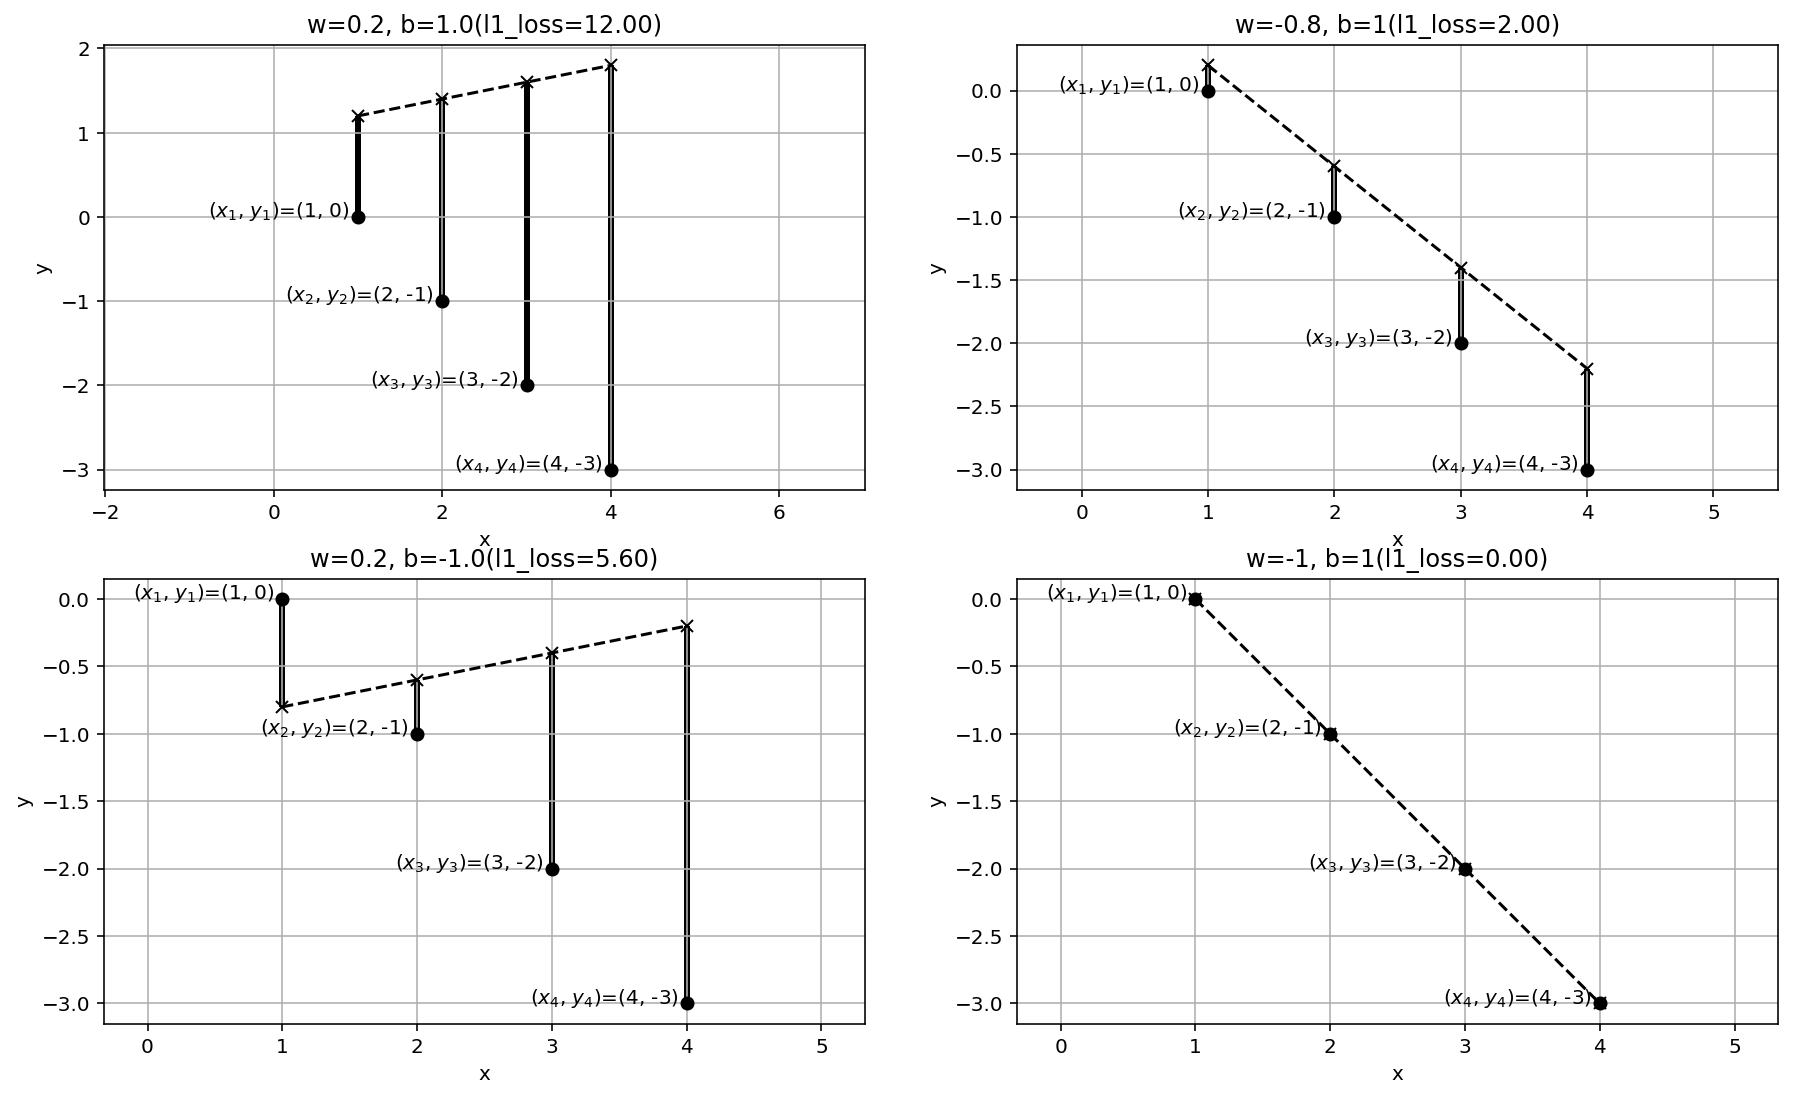

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def l1_loss(w,b,x,y):
    return np.sum(np.abs(w*x + b - y))

def visualize_l1(w, b, x_train, y_train, loss):
    loss_name = loss.__name__
    plt.plot(x_train, y_train, 'ok')
    plt.plot(x_train, w * x_train + b, '--kx')
    [plt.text(x, y, '($x_{0}$, $y_{0}$)=({1}, {2})  '.format(k, x, y), 
              horizontalalignment='right') for k, (x, y) in enumerate(zip(x_train, y_train),1)]
    currentAxis = plt.gca()
    for xx,yy in zip(x_train, y_train):
        currentAxis.add_patch(Rectangle((xx, yy), 0, w * xx + b - yy,
                              alpha=1.0, facecolor='k', edgecolor='k', linewidth=3))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("w={}, b={}({}={:1.2f})".format(w,b, loss_name, loss(w,b,x_train,y_train)))

x_train = np.array([1, 2, 3, 4])
y_train = np.array([0, -1, -2, -3])

plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
visualize_l1(0.2, 1.0, x_train, y_train, l1_loss)
plt.subplot(2,2,2)
visualize_l1(-0.8, 1, x_train, y_train, l1_loss)
plt.subplot(2,2,3)
visualize_l1(0.2, -1.0, x_train, y_train, l1_loss)
plt.subplot(2,2,4)
visualize_l1(-1, 1, x_train, y_train, l1_loss)
plt.show()